In [91]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#### Reading and Displaying an image (using open cv)

In [92]:
pic = cv2.imread("C:/Users/DELL/Desktop/Random/beautiful-1274361__480.jpg")
cv2.imshow("picture",pic)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)
#press 0 to close window

-1

In [93]:
print(pic.shape)

(480, 640, 3)


#### Writing an image

In [94]:
cv2.imwrite("something.jpg",pic)

True

#### Function for displaying an image

In [99]:
def showimage(img):
    fix_image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(fix_image)

#### Conversion to a Gray image

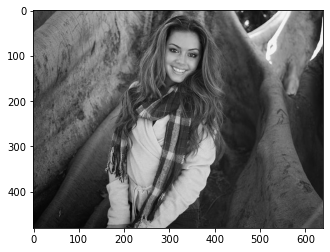

In [100]:
gray_image = cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)
showimage(gray_image)

#### Splitting the channels of the image

In [101]:
B , G , R = cv2.split(pic)
zeros = np.zeros(pic.shape[:2], dtype='uint8')

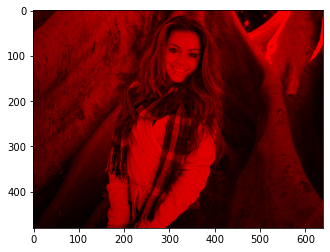

In [103]:
showimage(cv2.merge([zeros,zeros,R]))
# red channl

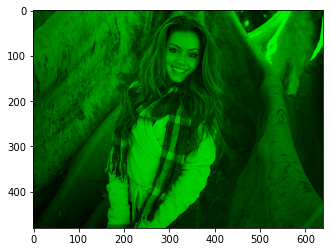

In [106]:
showimage(cv2.merge([zeros,G,zeros]))

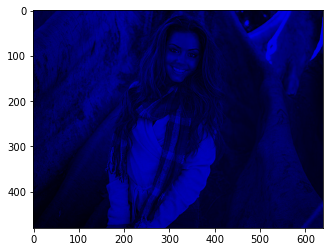

In [107]:
showimage(cv2.merge([B,zeros,zeros]))

#### Drawing on an image

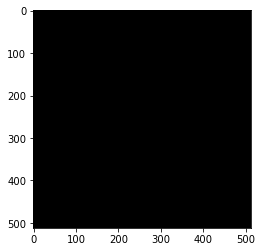

In [112]:
img = np.zeros((512,512,3),np.uint8)
showimage(img)

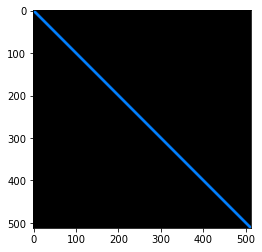

In [113]:
cv2.line(img, (0,0), (511,511), (255,127,0), 5 )
showimage(img)

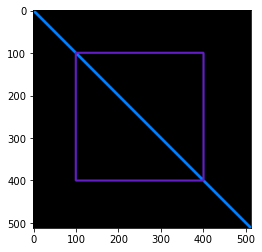

In [114]:
cv2.rectangle(img,(100,100), (400,400), (200,30,100), 4)
showimage(img)

In [115]:
cv2.circle(img, (400,100), 100, (211,100,50), 2)
showimage(img)

In [116]:
cv2.rectangle(img,(50,50), (90,90), (200,130,100), -1)
showimage(img)

In [117]:
pts = np.array([[10,50], [400,50], [90,200], [50,500]], np.int32)
print(pts)
pts = pts.reshape((-1,1,2))
print(pts)

[[ 10  50]
 [400  50]
 [ 90 200]
 [ 50 500]]
[[[ 10  50]]

 [[400  50]]

 [[ 90 200]]

 [[ 50 500]]]


In [118]:
cv2.polylines(img,[pts],True,(55,45,25), 8)
showimage(img)

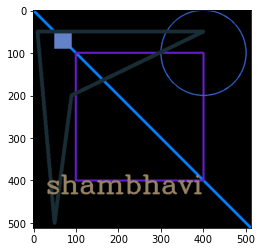

In [119]:
cv2.putText(img,'shambhavi',(30,430),cv2.FONT_HERSHEY_COMPLEX,2 ,color=(100,130,150),thickness=3)
showimage(img)

#### Translations
This is an affine transform that simply shifts the position of an image.<br>
We use cv2.warpAffinity to implement these transformations.

In [120]:
img1 = cv2.imread("C:/Users/DELL/Desktop/Random/tulips-5118757__480.jpg")

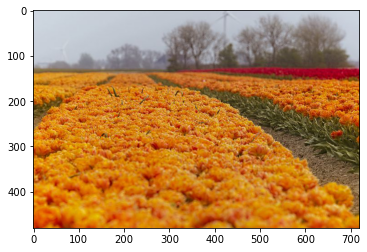

In [121]:
showimage(img1)

In [122]:
height, width = img1.shape[:2]
quarter_height, quarter_width = height/4, width/4

# | 1 0 Tx |
# | 0 1 Ty | = T
# T is our translation matrix
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])

img_translation = cv2.warpAffine(img1, T, (width,height))
showimage(img_translation)

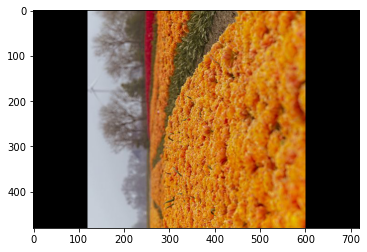

In [123]:
height, width = img1.shape[0:2]
rotation_matrix = cv2.getRotationMatrix2D((width/2,height/2),90,1)
rotated_img = cv2.warpAffine(img1,rotation_matrix,(width,height))
showimage(rotated_img)

In [124]:
rotation_matrix1 = cv2.getRotationMatrix2D((width/2,height/2),90,0.5)
rotated_img1 = cv2.warpAffine(img1,rotation_matrix1,(width,height))
showimage(rotated_img1)

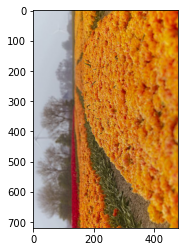

In [125]:
rotated_img2 = cv2.transpose(img1)
showimage(rotated_img2)

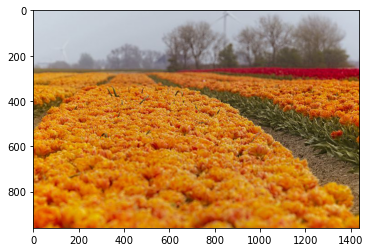

In [126]:
# doubling the size of the image
image_scaled2 = cv2.resize(img1,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
showimage(image_scaled2)

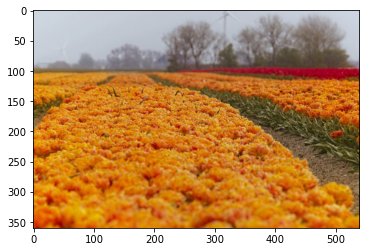

In [127]:
# shriking the image 3/4 of the original image
image_scaled34 = cv2.resize(img1,None, fx=0.75, fy=0.75)
showimage(image_scaled34)

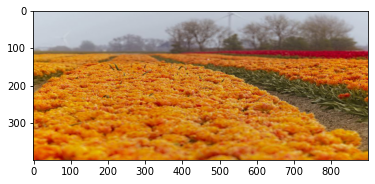

In [128]:
# resizing by setting the exact dimensions
image_scaleddim = cv2.resize(img1, (900,400), interpolation=cv2.INTER_AREA)
showimage(image_scaleddim)

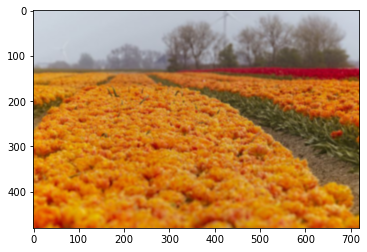

In [129]:
smaller = cv2.pyrDown(img1)
larger = cv2.pyrUp(smaller)
showimage(smaller)
showimage(larger)

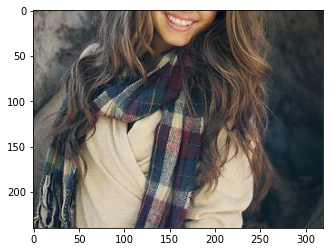

In [130]:
height, width = pic.shape[:2]
start_row, start_col = int(height * .25), int(width * .25)
end_row, end_col = int(height * .75), int(width * .75)
cropped_img = pic[start_row:end_row, start_col:end_col]
showimage(cropped_img)

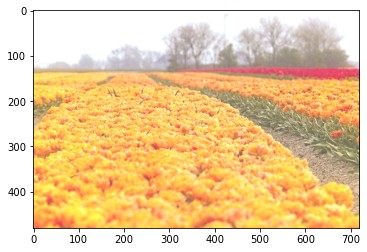

In [131]:
M =np.ones(img1.shape, dtype='uint8') * 75
added = cv2.add(img1,M)
showimage(added)

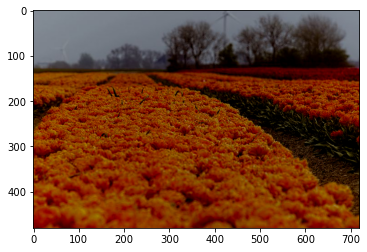

In [132]:
subtracted = cv2.subtract(img1,M)
showimage(subtracted)

#### Drawing shapes

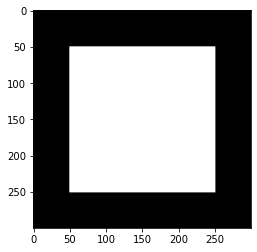

In [133]:
square = np.zeros((300,300), np.uint8)
cv2.rectangle(square, (50,50), (250,250), 255, -1)
showimage(square)

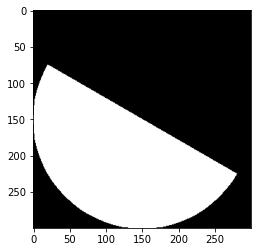

In [134]:
ellipse = np.zeros((300,300), np.uint8)
cv2.ellipse(ellipse, (150,150), (150,150), 30, 0 , 180, 255, -1)
showimage(ellipse)

#### Using Logical Operators

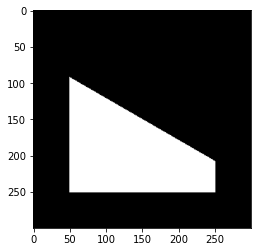

In [135]:
And = cv2.bitwise_and(square,ellipse)
showimage(And)

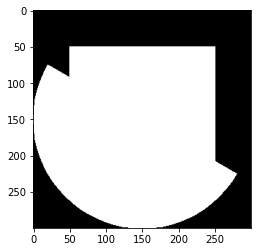

In [136]:
bitwiseOr = cv2.bitwise_or(square,ellipse)
showimage(bitwiseOr)

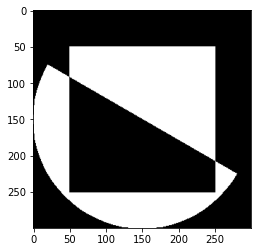

In [137]:
bitwiseXor = cv2.bitwise_xor(square,ellipse)
showimage(bitwiseXor)

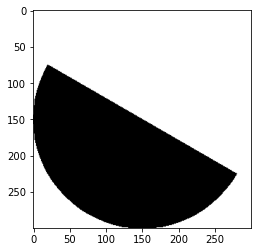

In [138]:
bitwiseNot_sq = cv2.bitwise_not(ellipse)
showimage(bitwiseNot_sq)

#### Blurring the image

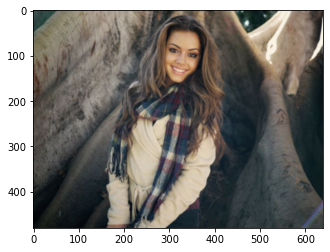

In [139]:
kernal_3x3 = np.ones((3,3), np.float32) / 9
blurred = cv2.filter2D(pic, -1, kernal_3x3)
showimage(blurred)

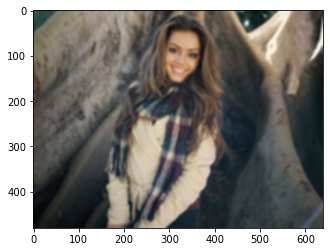

In [140]:
kernal_7x7 = np.ones((7,7), np.float32) / 49
blurred2 = cv2.filter2D(pic,-1,kernal_7x7)
showimage(blurred2)

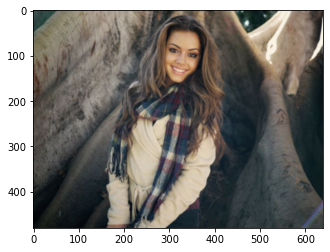

In [141]:
blur = cv2.blur(pic, (3,3))
showimage(blur)

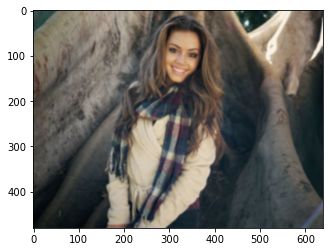

In [142]:
gaussian = cv2.GaussianBlur(pic,(7,7),0)
showimage(gaussian)

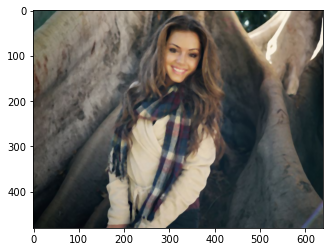

In [143]:
median = cv2.medianBlur(pic, 5)
showimage(median)

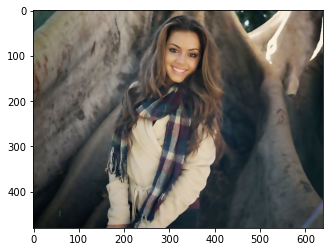

In [144]:
bilateral = cv2.bilateralFilter(pic,9,75,75)
showimage(bilateral)

In [145]:
denoise = cv2.fastNlMeansDenoisingColored(pic,None,6,6,7,21)
showimage(denoise)

#### Image Sharpening

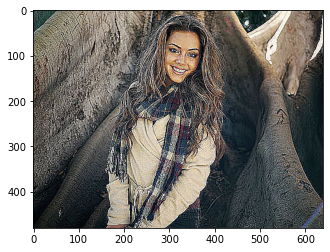

In [146]:
kernal_sharpening = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
sharpened = cv2.filter2D(pic,-1,kernal_sharpening)
showimage(sharpened)

#### Thresholding

In [164]:
grd_img = cv2.imread("C:/Users/DELL/Desktop/DL/tensorflow and keras/rajeev ratan/1.1 MasterOpenCV.tar.gz/1.1 MasterOpenCV/Master OpenCV/images/gradient.jpg")
showimage(grd_img)

In [148]:
ret, thresh1 = cv2.threshold(grd_img,127,200,cv2.THRESH_BINARY)
showimage(thresh1)

In [150]:
ret, thresh2 = cv2.threshold(grd_img,127, 200, cv2.THRESH_BINARY_INV)
showimage(thresh2)

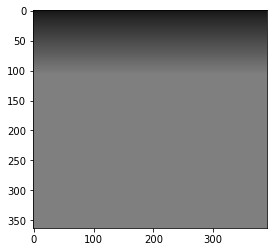

In [151]:
ret, thresh3 = cv2.threshold(grd_img,127, 200,cv2.THRESH_TRUNC)
showimage(thresh3)

In [152]:
ret, thresh4 = cv2.threshold(grd_img,127,255,cv2.THRESH_TOZERO)
showimage(thresh4)

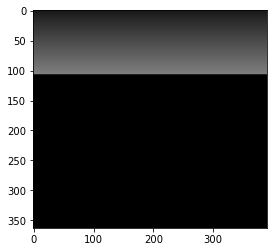

In [153]:
ret, thresh5 = cv2.threshold(grd_img,127,20, cv2.THRESH_TOZERO_INV)
showimage(thresh5)

#### Dilaion and Erosion

In [154]:
bwoc = cv2.imread("C:/Users/DELL/Desktop/DL/tensorflow and keras/rajeev ratan/1.1 MasterOpenCV.tar.gz/1.1 MasterOpenCV/Master OpenCV/images/opencv_inv.png")
showimage(bwoc)

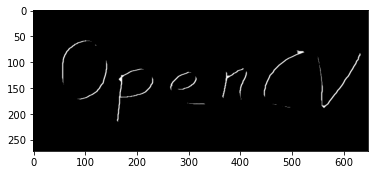

In [155]:
kernal = np.ones((5,5), np.uint8)
erosion = cv2.erode(bwoc,kernal,iterations = 1)
showimage(erosion)

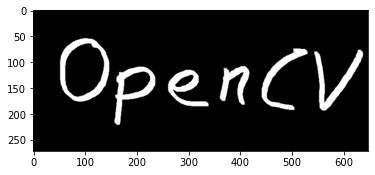

In [156]:
dilation = cv2.dilate(bwoc,kernal,iterations=1)
showimage(dilation)

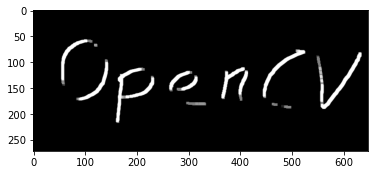

In [157]:
opening = cv2.morphologyEx(bwoc, cv2.MORPH_OPEN, kernal)
showimage(opening)
# erosion followed by dilation

In [158]:
closing = cv2.morphologyEx(bwoc,cv2.MORPH_CLOSE, kernal)
showimage(closing)
# dilation followed erosion

#### Edge Detection

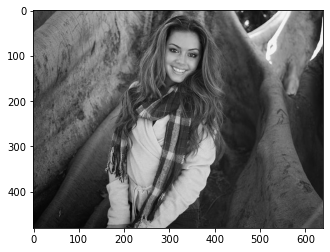

In [159]:
height, width = gray_image.shape
showimage(gray_image)

In [165]:
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F,0,1,ksize=5)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F,1,0,ksize=5)

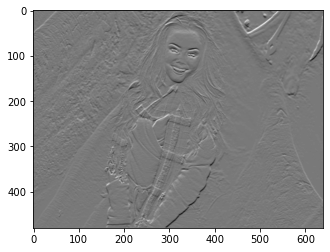

In [170]:
plt.imshow(sobel_x, cmap= 'gray')

In [171]:
plt.imshow(sobel_y, cmap= 'gray')

In [172]:
sobel_or = cv2.bitwise_or(sobel_x,sobel_y)
plt.imshow(sobel_or, cmap= 'gray')

C:\Users\DELL\anaconda3\envs\tf-gpu-dl\lib\site-packages\matplotlib\image.py:468: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


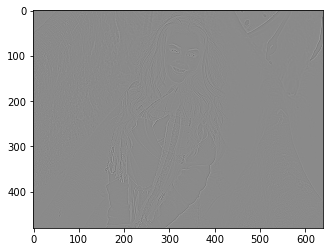

In [174]:
laplacian = cv2.Laplacian(gray_image,cv2.CV_64F)
plt.imshow(laplacian, cmap= 'gray')

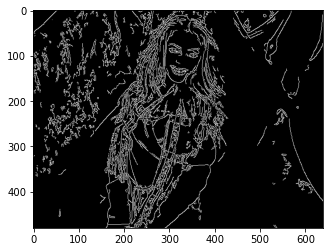

In [175]:
canny = cv2.Canny(gray_image, 90,200)
plt.imshow(canny, cmap= 'gray')

In [176]:
path = "C:/Users/DELL/Desktop/DL/tensorflow and keras/rajeev ratan/1.1 MasterOpenCV.tar.gz/1.1 MasterOpenCV/Master OpenCV/images/scan.jpg"
page = cv2.imread(path)
showimage(page)

In [177]:
points_A = np.float32([[320,15],[700,215], [85,610], [530,780]])
points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])

M = cv2.getPerspectiveTransform(points_A,points_B)

warped = cv2.warpPerspective(page, M, (420,594))

showimage(warped)